# Group Project #3

This is a group activity and worth 100 points. Each team should consist of 2 members. You can create a new group or retain your previous team members. The choice is yours. Use Canvas to create your own group. Create a code/name group (max 10 letters).

Team Members: (Name and Identikey)

* Member 1: Juliana Zweng (juzw3153)
* Member 2: Annelise Thorn (anth6800)
* Group Name: Team SF


Due Date: Dec 5th 10:00 am (Canvas)

Delivery include
* Report, Code and a Presentation

Upload: PDF, Jupyter Notebook file, and a PPT for the oral presentation.




# (100 points) Find the shortest route in your city between two points of interest.

Select a city and plan your route with a map and knowledge of traffic. You need to evaluate a shortes route (in time) from a designated initial (A) to a final destiny (J).


For a given scenario, you must evaluate the movement between points A and J in both directions. The time required to move from A to J and vice versa is the same. To assist in this evaluation, you must define internal nodes B, C, D, E, F, G, H, and I in the map provided as a reference. The number of internal nodes must be between 6 to 10 (inclusive). The connectivity of internal nodes will vary based on the specific case presented.



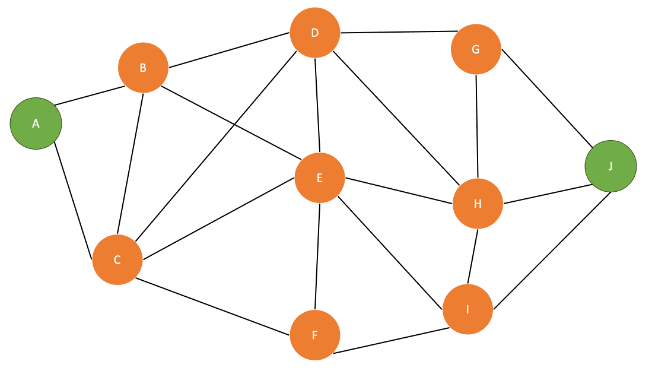

To solve a problem that requires finding the shortest path between two points in a graph, you need to implement Dijkstra’s Algorithm. You have the choice to use any data structure for representing the graph: edge list, adjacency list, adjacency matrix, etc. However, it's important to maintain consistency throughout. The weight of each connection in the graph should represent the time taken to traverse it and can be a float/decimal value.

Your team is required to develop two scenarios considering uncertainties. The first scenario is the base case with an average time. The second scenario is the rush hour with high traffic, which causes delays on most routes (not all of them). Your evaluation of both scenarios should incorporate some level of uncertainty. This means that a route can be blocked or delayed by 10 times or more. To make it more realistic, you need to identify at least three pairs of nodes that may encounter such a situation.

**Tips**:
* For the base case scenario, use Google Maps or Apple Maps to define the average time from each pair of nodes (weight).
* For the rush hour scenario, apply a factor between 1 -> 3. For example, you can define a random number using a normal distribution with media of 2 and a standard deviation of 0.5. Evaluate each case (node1->Node2) and apply your own base modification. Use the random library to solve this impact.
* Add uncertainty is a similar model for rush hour but with high impact and low probability events. Each case can be a discrete distribution (0,1) with 80% nothing happened with a 20% this unlike event will happen.  
* Every simulation can be different, and this is ok. You will present one case.
* If you have asspumtions explain in your report.

Provide context and show the solution using a map of the selected city. Below is a map you can use as a reference.



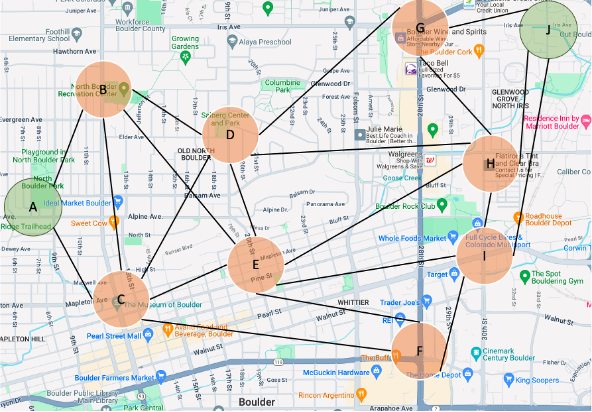

You need to create an organized and professinal report that includes:
* Description of your approach
* Description of the Data Structure used and the algorithm implementation.
* Test your algorithm with a manual calculation for the base case scenario.
* Show the results for each case scenario. Simulation base and rush hour scenarios
* A through discussion and analysis of your results.

Prepare a PowerPoint presentation with 3-6 slides. Use your Jupyter notebook/Python code to run your solution in real time. All team members must be present to be evaluated, however one or more can be the present during that day.
Presentation will start on Dec 5th.


Report (70 points), Presentation (20), Peer Review evaluation/Audience (10)


Note: The report can be a WORD/PDF file or a Jupuyter Notebook file.


#Scenario 1- Average Time


In [ ]:
from heapq import heapify, heappop, heappush

#create a dictionary to represent the points of interest and distances between them (nodes)
graph = {
   "A": {"B": 16, "C": 16 ,"D":10},
   "B": {"A": 16, "C": 5,"E": 16, "I": 17},
   "C": {"A": 16, "B": 5, "F": 9,"H": 10,"I": 16},
   "D": {"A":10, "E":12, "H":18, "I":7},
   "E": {"B": 16, "D": 12, "I": 12},
   "F": {"C": 9, "G": 8,"I": 22},
   "G": {"F": 8, "H": 7, "I": 16 },
   "H": {"C": 10, "D": 18,"G":7, "I": 14},
   "I": {"B": 17, "C": 16 , "D": 7 ,"E": 12 , "F": 22, "G": 16 ,"H": 14 , "J":3},
   "J": {"I":3}
}

class Graph:
    def __init__(self, graph: dict = {}):
      self.graph = graph  #create adjacency list as instance of graph class

    def shortest_distances(self, source: str):
      distances = {node: float("inf") for node in self.graph}  #initialize distances to infinity
      distances[source] = 0

      #initialize a priority queue
      pq = [(0, source)]
      heapify(pq)

      #create a set to hold visited nodes
      visited = set()

      while pq:  #while the priority queue isn't empty
        current_distance, current_node = heappop(pq)  #get the node with the min distance

        if current_node in visited:
          continue  #skip already visited nodes
        visited.add(current_node)  #else, add the node to visited set

        for neighbor, weight in self.graph[current_node].items(): #calculate the distance from current_node to the neighbor
          tentative_distance = current_distance + weight
          if tentative_distance < distances[neighbor]: #replace with shorter distance if applicable
            distances[neighbor] = tentative_distance
            heappush(pq, (tentative_distance, neighbor)) #push current node to priority queue

      return distances

#pass the graph through our class
G = Graph(graph=graph)

In [ ]:
#test code
distances = G.shortest_distances("A")
print(distances, "\n")

to_J = distances["J"]
print(f"The shortest travel time from A to J is {to_J} mins")

{'A': 0, 'B': 21, 'C': 35, 'D': 25, 'E': 40, 'F': 66, 'G': 90, 'H': 55, 'I': 45, 'J': 51} 

The shortest travel time from A to J is 51 mins


#Scenario 2: High Traffic

In [ ]:
import random
from heapq import heapify, heappop, heappush

#dictionary to represent the points of interest (nodes)
graph = {
       "A": {"B": 16, "C": 16, "D": 10},
   "B": {"C": 5, "E": 16, "I": 17},
   "C": {"F": 9, "H": 10, "I": 16},
   "D": {"E": 12, "H": 18, "I": 7},
   "E": {"I": 12},
   "F": {"G": 8, "I": 22},
   "G": {"H": 7, "I": 16},
   "H": {"I": 14},
   "I": {"J": 3},
   "J": {}
}

def apply_rush_hour_traffic(graph):
  modified_graph = {}

  for node, neighbors in graph.items(): #loop through each node and its neighbors in the original graph
    modified_graph[node] = {}
    for neighbor, weight in neighbors.items(): #loop through each neighbor of the current node
      traffic_factor = max(1, random.gauss(2, 0.5)) #normal distrib, mean=2, stand dev=0.5, min fact=1)
      rush_hour_weight = (weight * traffic_factor)

      rush_hour_weight_impact = 0 #initalize
      high_impact_event = random.choices([0, 1], weights = [0.8, 0.2]) [0] #simulate high-impact event 20% probability
      if high_impact_event:
        rush_hour_weight_impact = random.uniform(0.5, 2)
        rush_hour_weight += weight * rush_hour_weight_impact #if event occurs, increase weight
      modified_graph[node][neighbor] = int(rush_hour_weight)

      print(
            f"Edge {node} -> {neighbor}: "
            f"Base Weight = {weight}\t"
            f"Traffic Factor = {traffic_factor:.2f}\t"
            f"High Impact Event = {high_impact_event}\t"
            f"Impact Factor = {rush_hour_weight_impact:.2f}\t"
            f"Final Weight = {int(rush_hour_weight)}"
            )

  return modified_graph

class Graph:
    def __init__(self, graph: dict = {}):
      self.graph = graph  #dictionary for the adjacency list

    def shortest_distances(self, source: str):
      distances = {node: float("inf") for node in self.graph}  #initialize distances to infinity
      distances[source] = 0

      #initialize a priority queue
      pq = [(0, source)]
      heapify(pq)

      #create a set to hold visited nodes
      visited = set()

      while pq:  #while the priority queue isn't empty
        current_distance, current_node = heappop(pq)  #get the node with the min distance

        if current_node in visited:
          continue  #skip already visited nodes
        visited.add(current_node)  #else, add the node to visited set

        for neighbor, weight in self.graph[current_node].items(): #calculate the distance from current_node to the neighbor
          tentative_distance = current_distance + weight
          if tentative_distance < distances[neighbor]:
            distances[neighbor] = tentative_distance
            heappush(pq, (tentative_distance, neighbor))

      return distances

modified_graph = apply_rush_hour_traffic(graph)
G = Graph(graph=modified_graph)

Edge A -> B: Base Weight = 16	Traffic Factor = 2.08	High Impact Event = 0	Impact Factor = 0.00	Final Weight = 33
Edge A -> C: Base Weight = 16	Traffic Factor = 1.67	High Impact Event = 0	Impact Factor = 0.00	Final Weight = 26
Edge A -> D: Base Weight = 10	Traffic Factor = 1.93	High Impact Event = 1	Impact Factor = 1.69	Final Weight = 36
Edge B -> C: Base Weight = 5	Traffic Factor = 1.60	High Impact Event = 1	Impact Factor = 1.74	Final Weight = 16
Edge B -> E: Base Weight = 16	Traffic Factor = 2.33	High Impact Event = 0	Impact Factor = 0.00	Final Weight = 37
Edge B -> I: Base Weight = 17	Traffic Factor = 1.75	High Impact Event = 1	Impact Factor = 1.71	Final Weight = 58
Edge C -> F: Base Weight = 9	Traffic Factor = 2.44	High Impact Event = 1	Impact Factor = 1.92	Final Weight = 39
Edge C -> H: Base Weight = 10	Traffic Factor = 1.77	High Impact Event = 1	Impact Factor = 1.42	Final Weight = 31
Edge C -> I: Base Weight = 16	Traffic Factor = 2.72	High Impact Event = 0	Impact Factor = 0.00	Fin

In [ ]:
#test code
distances = G.shortest_distances("A")
print(distances, "\n")

to_J = distances["J"]
print(f"The shortest travel time from A to J is {to_J} mins")


{'A': 0, 'B': 43, 'C': 26, 'D': 21, 'E': 43, 'F': 36, 'G': 56, 'H': 46, 'I': 35, 'J': 40} 

The shortest travel time from A to J is 40 mins
